In [1]:
from google.colab import userdata
key = userdata.get('hf-api')

from huggingface_hub import login
login(token=key)

In [2]:
!pip install torchvision
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-8nodxyet
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-8nodxyet
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


In [1]:
import os
import clip
import torch
from torchvision.datasets import CIFAR100

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cuda


In [2]:
model, preprocess = clip.load('ViT-B/32', device)


Class ID: 78, Class Name: snake


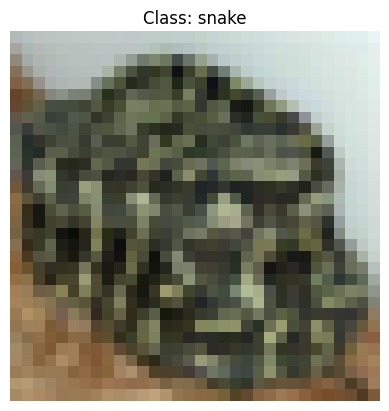

In [3]:
# Download the dataset
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

# Prepare the inputs
image, class_id = cifar100[3637]
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

print(f"Class ID: {class_id}, Class Name: {cifar100.classes[class_id]}")

import matplotlib.pyplot as plt

# Display the image
plt.imshow(image)
plt.axis('off')
plt.title(f"Class: {cifar100.classes[class_id]}")
plt.show()


In [4]:

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")




Top predictions:

           snake: 65.23%
          turtle: 12.45%
    sweet_pepper: 3.86%
          lizard: 1.88%
       crocodile: 1.74%


In [5]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


In [7]:
image = preprocess(Image.open("./cat3.jpg")).unsqueeze(0).to(device)
text_list = ["a diagram", "a dog", "a cat"]
text = clip.tokenize(text_list).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)

    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

probs

array([[3.138e-04, 3.706e-03, 9.961e-01]], dtype=float16)

In [8]:
print("Label probs:")  # prints: [[0.9927937  0.00421068 0.00299572]]
for i in range(len(probs[0])):
  print(f'{text_list[i]}: {probs[0][i]}')


Label probs:
a diagram: 0.00031375885009765625
a dog: 0.0037059783935546875
a cat: 0.99609375
